In [180]:
import csv
import pandas as pd
import xml.etree.ElementTree as et
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from datetime import datetime as dt
import socceraction.xthreat as xthreat
import socceraction.spadl as spadl
from socceraction.xthreat import ExpectedThreat
import matplotsoccer as mps
from scipy.interpolate import CloughTocher2DInterpolator
from statsbombpy import sb
from scipy.interpolate import make_interp_spline

In [181]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [189]:

# Obtener todas las competiciones
competitions = sb.competitions()

# Filtrar competiciones por país y temporada
competitions_filtered = competitions[(competitions['country_name'] == 'Spain') & 
                                     (competitions['season_name'] == '2020/2021')]

# Mostrar el resultado
print(competitions_filtered)


    competition_id  season_id country_name competition_name  \
38              11         90        Spain          La Liga   

   competition_gender  competition_youth  competition_international  \
38               male              False                      False   

   season_name               match_updated           match_updated_360  \
38   2020/2021  2024-07-15T15:15:28.367546  2024-07-15T15:17:45.455234   

           match_available_360             match_available  
38  2024-07-15T15:17:45.455234  2024-07-15T15:15:28.367546  


In [198]:
laliga = sb.matches(competition_id=11, season_id=90)
# Ordenar el dataframe por match_id de forma ascendente
laliga_sorted = laliga.sort_values(by='match_date', ascending=True)

# Mostrar las primeras filas del dataframe ordenado
print(laliga_sorted)


    match_id  match_date      kick_off      competition     season  \
7    3773593  2020-09-27  21:00:00.000  Spain - La Liga  2020/2021   
8    3773466  2020-10-01  21:30:00.000  Spain - La Liga  2020/2021   
11   3773672  2020-10-04  21:00:00.000  Spain - La Liga  2020/2021   
12   3773587  2020-10-17  21:00:00.000  Spain - La Liga  2020/2021   
9    3773585  2020-10-24  16:00:00.000  Spain - La Liga  2020/2021   
0    3773386  2020-10-31  21:00:00.000  Spain - La Liga  2020/2021   
34   3773477  2020-11-07  16:15:00.000  Spain - La Liga  2020/2021   
13   3773656  2020-11-21  21:00:00.000  Spain - La Liga  2020/2021   
30   3773547  2020-11-29  14:00:00.000  Spain - La Liga  2020/2021   
24   3773428  2020-12-05  21:00:00.000  Spain - La Liga  2020/2021   
6    3773660  2020-12-13  21:00:00.000  Spain - La Liga  2020/2021   
22   3773523  2020-12-16  21:00:00.000  Spain - La Liga  2020/2021   
14   3773377  2020-12-19  16:15:00.000  Spain - La Liga  2020/2021   
23   3773571  2020-1

c:\Users\Arnau Climent\venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [199]:
laliga = sb.events(match_id=3773593)
laliga.columns

c:\Users\Arnau Climent\venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_other', 'clearance_right_foot', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected',
       'pass_end_locat

In [200]:
laliga.type.value_counts()

type
Pass                1312
Ball Receipt*       1272
Carry               1128
Pressure             237
Ball Recovery         86
Block                 42
Duel                  33
Dribble               32
Goal Keeper           28
Dribbled Past         23
Shot                  22
Clearance             21
Foul Committed        19
Foul Won              18
Interception          16
Miscontrol            15
Dispossessed          11
Substitution           9
Half Start             4
Half End               4
Error                  2
Starting XI            2
Own Goal Against       1
Own Goal For           1
Offside                1
Injury Stoppage        1
Shield                 1
Tactical Shift         1
Name: count, dtype: int64

In [233]:
dfxT_laliga = laliga[laliga['type'].isin(['Pass', 'Carry'])].reset_index(drop=True)[['id', 'minute', 'player', 'team', 'type','location', 'pass_end_location', 'pass_outcome','carry_end_location']]


In [234]:
dfxT_laliga[['x', 'y']] = dfxT_laliga['location'].apply(lambda x: pd.Series(x))
dfxT_laliga[['Pass_end_x', 'Pass_end_y']] = dfxT_laliga['pass_end_location'].apply(lambda x: pd.Series(x))
dfxT_laliga[['Carry_end_x', 'Carry_end_y']] = dfxT_laliga['carry_end_location'].apply(lambda x: pd.Series(x))
dfxT_laliga.head()

,id,minute,player,team,type,location,pass_end_location,pass_outcome,carry_end_location,x,y,Pass_end_x,Pass_end_y,Carry_end_x,Carry_end_y
0,831a197f-895a-4a8b-970c-45b722a0752e,0,Francisco Alcácer García,Villarreal,Pass,"[61.0, 40.1]","[49.5, 48.9]",NaN,NaN,61.0,40.1,49.5,48.9,NaN,NaN
1,1adf165d-2594-4b9a-9fb3-4c62ac161bd6,0,Francis Joseph Coquelin,Villarreal,Pass,"[48.8, 48.3]","[29.8, 37.4]",NaN,NaN,48.8,48.3,29.8,37.4,NaN,NaN
2,a367100b-1c4b-47aa-8761-3d79315e27ab,0,Pau Francisco Torres,Villarreal,Pass,"[37.0, 35.2]","[91.6, 69.9]",NaN,NaN,37.0,35.2,91.6,69.9,NaN,NaN
3,5efb4355-3b5c-4984-ae07-9e2c50026c66,0,Gerard Moreno Balaguero,Villarreal,Pass,"[92.2, 70.1]","[114.5, 71.4]",NaN,NaN,92.2,70.1,114.5,71.4,NaN,NaN
4,07c56bf0-585a-4455-8977-65431becac6b,0,Norberto Murara Neto,Barcelona,Pass,"[6.0, 36.0]","[9.3, 27.3]",NaN,NaN,6.0,36.0,9.3,27.3,NaN,NaN


In [235]:
def xT(df, type):
    # Cargar la matriz xT desde el archivo
    xT = pd.read_excel("C:\\Users\\Arnau Climent\\OneDrive\\Documentos\\1_MASTER\\PORTFOLIO\\futbol-data-visualizacion\\archivos\\xT\\xTGrid.xlsx", header=None)
    xT = np.array(xT)
    xT_rows, xT_cols = xT.shape
    if type not in ['Pass', 'Carry']:
        raise ValueError("El parámetro type solo acepta 'Pass' o 'Carry'")
    df_xT = df[df['type'] == f'{type}']
    df_xT = df_xT.dropna(subset=['x', 'y', f'{type}_end_x', f'{type}_end_y'])
    df_xT['x1_bin'] = pd.cut(df_xT['x'], bins=xT_cols, labels=False)
    df_xT['y1_bin'] = pd.cut(df_xT['y'], bins=xT_rows, labels=False)
    df_xT['x2_bin'] = pd.cut(df_xT[f'{type}_end_x'], bins=xT_cols, labels=False)
    df_xT['y2_bin'] = pd.cut(df_xT[f'{type}_end_y'], bins=xT_rows, labels=False)
    if type == 'Pass':
        df_xT = df_xT.loc[(df_xT['pass_outcome'].isna())]
    df_xT['x1_bin'] = df_xT['x1_bin'].astype(int)
    df_xT['y1_bin'] = df_xT['y1_bin'].astype(int)
    df_xT['x2_bin'] = df_xT['x2_bin'].astype(int)
    df_xT['y2_bin'] = df_xT['y2_bin'].astype(int)
    df_xT['start_zone_value'] = df_xT[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
    df_xT['end_zone_value'] = df_xT[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
    df_xT['xT'] = df_xT['end_zone_value'] - df_xT['start_zone_value']
    df_xT = df_xT[['player', 'team', 'minute','type', 'x', 'y', f'{type}_end_x', f'{type}_end_y', 'xT']]
    return df_xT 

In [236]:
def limpiar_df(partido_entero):
    df_limpio = partido_entero[partido_entero['type'].isin(['Pass', 'Carry'])].reset_index(drop=True)[['id', 'minute', 'player', 'team', 'type','location', 'pass_end_location', 'pass_outcome','carry_end_location']]
    df_limpio[['x', 'y']] = df_limpio['location'].apply(lambda x: pd.Series(x))
    df_limpio[['Pass_end_x', 'Pass_end_y']] = df_limpio['pass_end_location'].apply(lambda x: pd.Series(x))
    df_limpio[['Carry_end_x', 'Carry_end_y']] = df_limpio['carry_end_location'].apply(lambda x: pd.Series(x))
    return df_limpio

In [237]:

# ---------------------------
# 1. Primero la función auxiliar corregida (EVITA EL ERROR)
# ---------------------------
def concatenar_xTdfs(df):
    types = ['Pass', 'Carry']
    dfs_to_concat = []  # Lista para acumular DataFrames
    
    for action_type in types:
        df_xT = xT(df, type=action_type)  # Asumo que tienes esta función definida
        if not df_xT.empty:
            dfs_to_concat.append(df_xT)
    
    return pd.concat(dfs_to_concat, ignore_index=True) if dfs_to_concat else pd.DataFrame()

# ---------------------------
# 2. Luego la función principal (LA QUE GRAFICA)
# ---------------------------
def xT_flow_chart(df, idlocal, color_local, color_visitante):
    df_limpio = limpiar_df(df)  # Asumo que tienes esta función
    xT_df = concatenar_xTdfs(df_limpio)  # Usa la función corregida
    
    # Resto del código original (visualización)
    df_goles = df[df['shot_outcome'] == 'Goal']
    xT_local = xT_df[xT_df['team'] == idlocal].groupby('minute', as_index=False).sum()[['minute','xT']].set_index('minute')
    xT_visit = xT_df[xT_df['team'] != idlocal].groupby('minute', as_index=False).sum()[['minute','xT']].set_index('minute')
    
    xT_tot = xT_local.merge(xT_visit, left_index=True, right_index=True, how='outer', suffixes=['_loc', '_vis']).fillna(0)
    xT_tot['dif_tot'] = xT_tot['xT_loc'] - xT_tot['xT_vis']
    
    # Suavizado de la curva
    x, y = xT_tot.index, xT_tot.dif_tot
    spline = make_interp_spline(x, y)
    X_new = np.linspace(x.min(), x.max(), 500)
    Y_new = spline(X_new)
    
    # Gráfico
    plt.figure(figsize=(12, 4))
    plt.plot(X_new, Y_new, color='black', lw=1)
    plt.axhline(0, color='gray', ls='--')
    plt.fill_between(X_new, Y_new, color=color_local, where=Y_new > 0, alpha=0.7)
    plt.fill_between(X_new, Y_new, color=color_visitante, where=Y_new < 0, alpha=0.7)
    
    # Marcadores de goles
    for minute, team in zip(df_goles.minute, df_goles.team):
        plt.axvline(minute, color=color_local if team == idlocal else color_visitante, ls=':', lw=1.2)
    
    # Estilo
    plt.gca().spines[['top', 'right', 'left']].set_visible(False)
    plt.tick_params(axis='x', colors='black')
    plt.xlim(0, x.max())
    plt.ylabel('Diferencia de xT')
    plt.xlabel('Minuto')
    plt.title('Flujo de Expected Threat (xT)')

## Momentos de Dominio a lo largo del partido

c:\Users\Arnau Climent\venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
C:\Users\Arnau Climent\AppData\Local\Temp\ipykernel_23756\3367495330.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_xT['start_zone_value'] = df_xT[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
C:\Users\Arnau Climent\AppData\Local\Temp\ipykernel_23756\3367495330.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_xT['end_zone_value'] = df_xT[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
C:\Users\Arnau Climent\AppDat

Text(0.5, 1.0, 'Match Momentum de Barcelona vs. Villarreal')

<Figure size 1600x900 with 0 Axes>

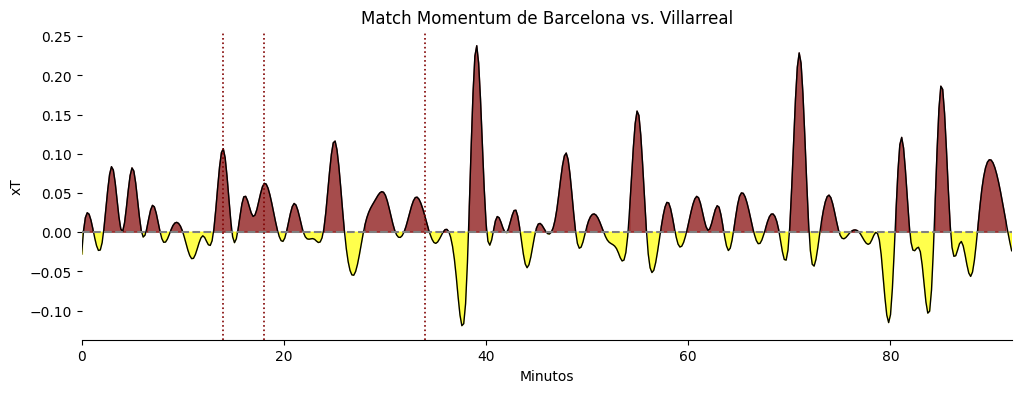

In [242]:
color_local = 'maroon'
color_visitante = 'yellow'
fig = plt.figure(figsize=(16,9))
fig.set_facecolor('white')
partido = sb.events(match_id=3773593)
equipo_1 = partido.team.values[0]
equipo_2 = partido.team.values[1]
xT_flow_chart(partido,idlocal = equipo_1,color_local=color_local,color_visitante=color_visitante)
plt.ylabel('xT')
plt.xlabel('Minutos')
equipo_1 = partido.team.values[0]
equipo_2 = partido.team.values[1]
plt.title(f'Match Momentum de {equipo_1} vs. {equipo_2}')